In [1]:
# OpenCV Object Recognition
import cv2 ## pip install opencv-python
import matplotlib.pyplot as plt

In [2]:
# Import config_file and frozen_model
config_file = './config/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = './config/frozen_inference_graph.pb'

In [3]:
# Compile the model
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [4]:
# Read class labels
classLabels = [] 
file_name = './config/Labels.txt'
with open(file_name, 'rt') as fpt: 
    classLabels = fpt.read().rstrip('\n').split('\n')

print(len(classLabels))
print(classLabels)

91
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [5]:
# Model settings
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5) ## 255/2 = 127.5
model.setInputMean((127.5, 127.5, 127.5)) ## data normalization => [-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 0000020672D5BC10>

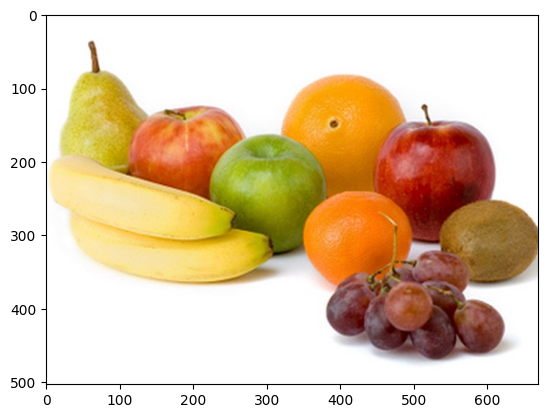

In [6]:
# read an image
img = cv2.imread('./img_video/fruit.jpg') ## BGR
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [7]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.55)
print(ClassIndex)

[53 53 55 55 52 53]


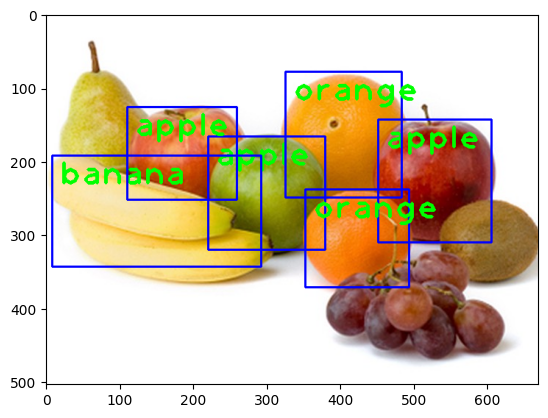

In [8]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255,0,0), 2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

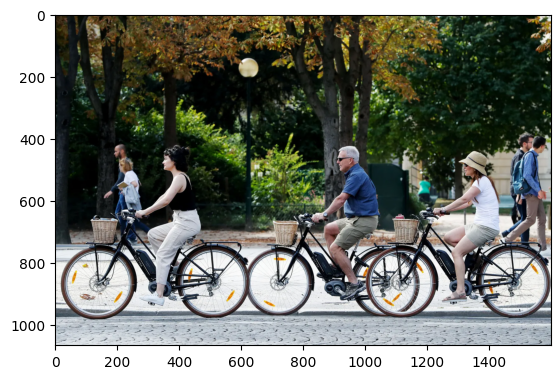

In [9]:
# read an image
img = cv2.imread('./img_video/street.jpg') ## BGR
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [10]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.6)
print(ClassIndex)

[2 2 1 2 1 1 1]


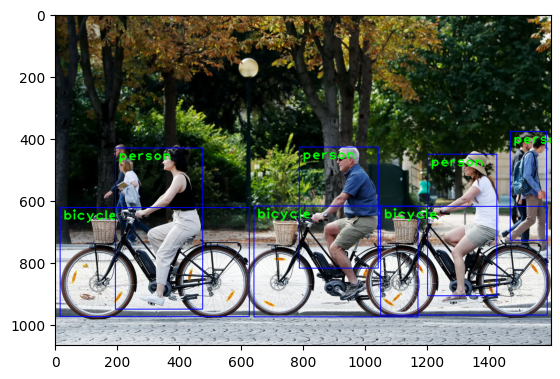

In [11]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255,0,0), 2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

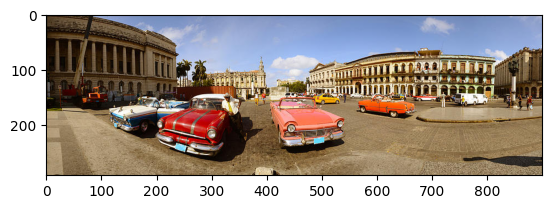

In [12]:
# read an image
img = cv2.imread('./img_video/havana_cuba_panorama.jpg') ## BGR
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [13]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.6)
print(ClassIndex)

[3 3 3 3 3 1 3 1 3 3]


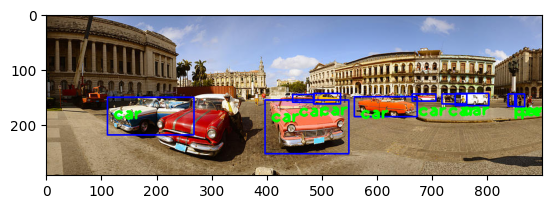

In [14]:
font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255,0,0), 2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [17]:
# read a video
cap = cv2.VideoCapture("./img_video/fruit_market.mp4")

# check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")

In [18]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    # print(ClassIndex)
    if(len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassInd <= 91):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
                
    cv2.imshow('Fruit Detection', frame)
    
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

In [19]:
cap.release()
cv2.destroyAllWindows()